In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import os.path
from datetime import datetime, timedelta, date
import time

import matplotlib.pyplot as plt
import proplot as pplt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

from nmme_utils import *

def is_month(month):
   return (month == 6)

In [3]:
# Eliminate Warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Set xarray to keep attributes
xr.set_options(keep_attrs=True)  

In [5]:
fcst_url='http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.FORECAST/.EARLY_MONTH_SAMPLES/.MONTHLY/.sst/[M]average/dods'
ds_fcst=xr.open_dataset(fcst_url,decode_times=False,chunks={'S':'500MB'})
ds_fcst = decode_cf(ds_fcst, 'S')
ds_fcst['S']=ds_fcst['S'].astype("datetime64[ns]")

In [6]:
hcst_url='http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.HINDCAST/.PENTAD_SAMPLES/.MONTHLY/.sst/[M]average/dods'
ds_hcst=xr.open_dataset(hcst_url,decode_times=False,chunks={'S':'500MB'})
ds_hcst = decode_cf(ds_hcst, 'S')
ds_hcst['S']=ds_hcst['S'].astype("datetime64[ns]")

In [7]:
ds_fcst

<xarray.Dataset>
Dimensions:  (Y: 181, L: 10, S: 148, X: 360)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * S        (S) datetime64[ns] 2011-03-01 2011-04-01 ... 2023-05-01 2023-06-01
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    sst      (S, L, Y, X) float64 dask.array<chunksize=(95, 10, 181, 360), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL

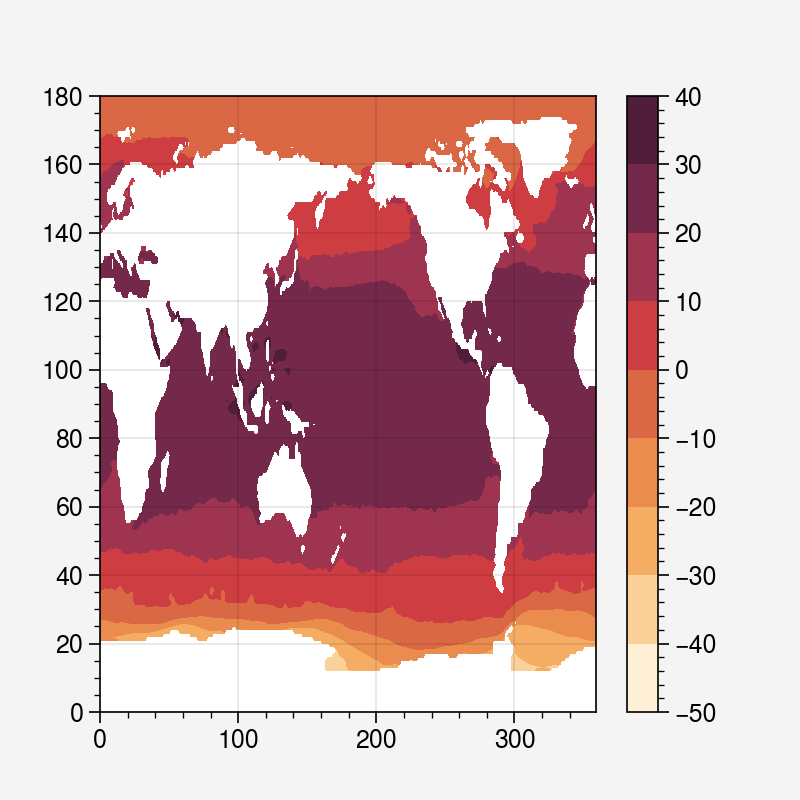

In [8]:
plt.contourf(ds_fcst['sst'].sel(S='2012-06',L=0.5).squeeze())
plt.colorbar()

In [9]:
ds_hcst

<xarray.Dataset>
Dimensions:  (Y: 181, L: 10, S: 366, X: 360)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * S        (S) datetime64[ns] 1982-01-01 1982-02-01 ... 2012-05-01 2012-06-01
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    sst      (S, L, Y, X) float64 dask.array<chunksize=(95, 10, 181, 360), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL

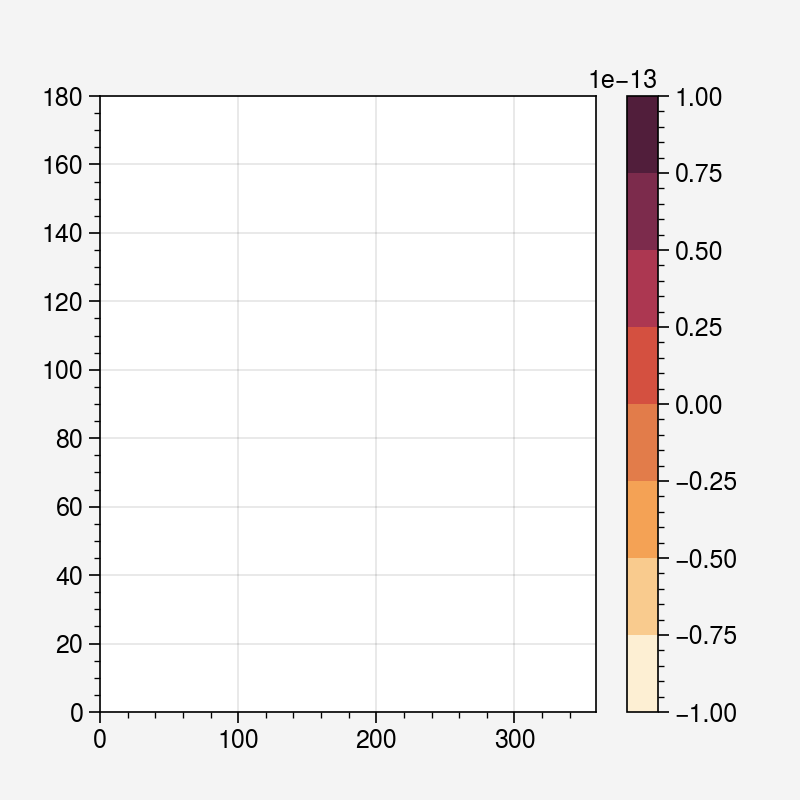

In [10]:
plt.contourf(ds_hcst['sst'].sel(S='2011-06',L=0.5).squeeze())
plt.colorbar()

In [11]:
tmp1=ds_hcst.sel(S=slice('1991-01','2011-02'))
tmp2=ds_fcst.sel(S=slice('2011-03','2020-12'))
ds=xr.concat([tmp1,tmp2],'S')

In [12]:
ds['L'] = (ds['L'] - 0.5).astype('int')
ds=ds.rename({'X':'lon','Y':'lat','L':'lead'})  
ds['lead'].attrs = {'units': 'months'}
ds['lon'].attrs['units']='degrees_east'
ds['lat'].attrs['units']='degrees_north'

In [13]:
#del(ds.S.attrs["calendar"])
#ds.to_netcdf('testsstclim.nc',encoding=None)

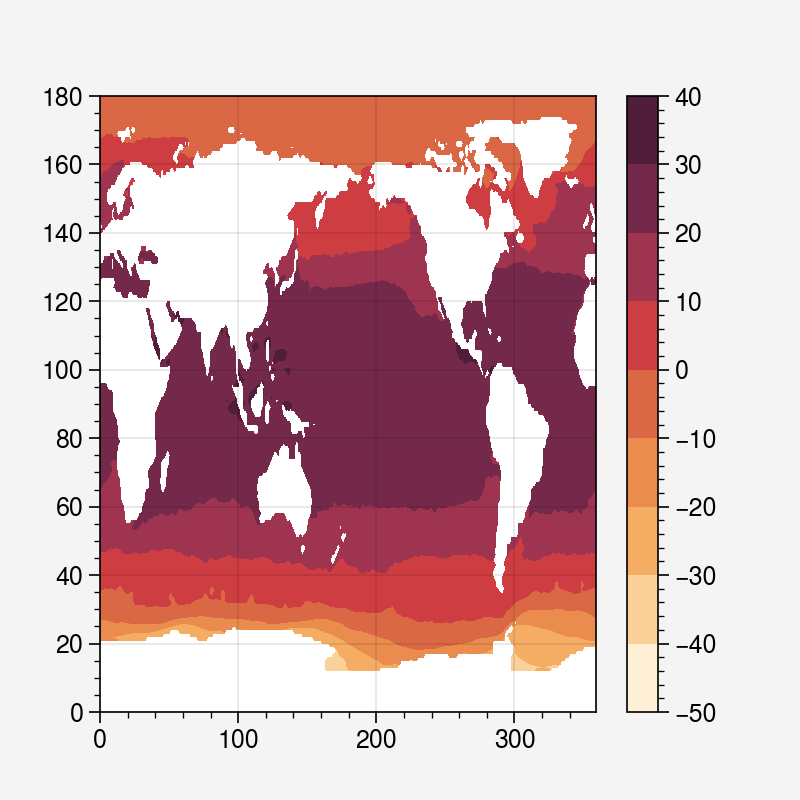

In [17]:
plt.contourf(ds['sst'].sel(S='2012-06-01',lead=0))
plt.colorbar()

In [18]:
ds_clim=ds.groupby('S.month').mean()
ds_clim

<xarray.Dataset>
Dimensions:  (lat: 181, lead: 10, lon: 360, month: 12)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lead     (lead) int64 0 1 2 3 4 5 6 7 8 9
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lead, lat, lon) float64 dask.array<chunksize=(1, 10, 181, 360), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL

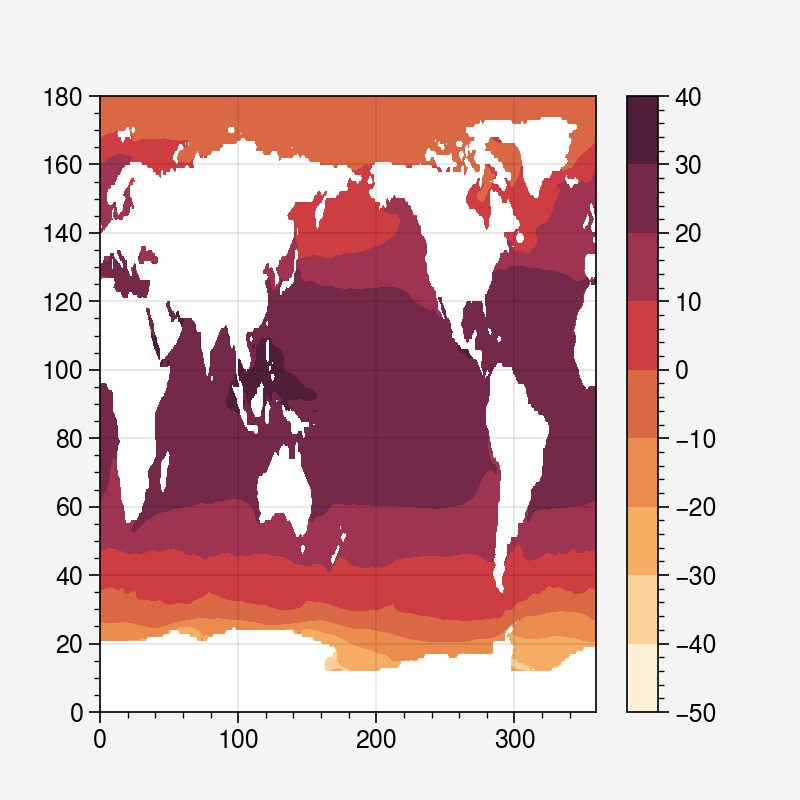

In [19]:
plt.contourf(ds_clim['sst'].sel(lead=0,month=6))
plt.colorbar()

In [20]:
#ds_clim.to_netcdf('testsstclim.nc',encoding=None)